In [1]:
# Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from bokeh.io import curdoc
# from bokeh.plotting import figure, output_file, output_notebook, show, ColumnDataSource
# from bokeh.models.tools import HoverTool
# from bokeh.models import Select
# from bokeh.transform import factor_cmap
# from bokeh.palettes import Blues8
# from bokeh.palettes import Inferno256
# from bokeh.layouts import row, gridplot

In [2]:
# Import Monthly Movie data 2019-2023
monthly_df = pd.read_csv('master_merged_df.csv')

In [3]:
monthly_df.columns

Index(['Month', 'Year', 'Cumulative Gross', '% of Year', 'Releases', 'Average',
       'Holiday Gross', 'Holiday Releases'],
      dtype='object')

In [4]:
monthly_df.describe()

,Year,Cumulative Gross,Releases,Average,Holiday Gross,Holiday Releases
count,60.000000,6.000000e+01,60.000000,6.000000e+01,4.000000e+01,40.000000
mean,2021.000000,5.705832e+08,111.483333,4.784433e+06,1.190501e+08,62.925000
std,1.426148,3.666248e+08,51.147010,3.015350e+06,9.832822e+07,57.959928
min,2019.000000,5.201500e+04,6.000000,8.669000e+03,3.675000e+03,2.000000
25%,2020.000000,3.057117e+08,84.750000,2.557546e+06,4.498154e+07,38.500000
50%,2021.000000,5.836546e+08,97.000000,4.812384e+06,1.201316e+08,49.500000
75%,2022.000000,8.190449e+08,136.500000,6.212085e+06,1.707196e+08,75.000000
max,2023.000000,1.362544e+09,225.000000,1.481026e+07,4.985782e+08,372.000000


In [5]:
monthly_df.head(3)

,Month,Year,Cumulative Gross,% of Year,Releases,Average,Holiday Gross,Holiday Releases
0,December,2023,748028610,8.4%,133,5624275,63107349.0,39.0
1,November,2023,551964146,6.2%,111,4972649,173203005.0,40.0
2,October,2023,556040943,6.2%,115,4835138,NaN,NaN


In [6]:
reverse_rev = monthly_df.iloc[::-1]
reverse_rev.head(3)

,Month,Year,Cumulative Gross,% of Year,Releases,Average,Holiday Gross,Holiday Releases
59,January,2019,812849718,7.2%,161,5048756,221945359.0,122.0
58,February,2019,624462229,5.5%,147,4248042,152447001.0,86.0
57,March,2019,962715490,8.5%,192,5014143,NaN,NaN


In [7]:
reverse_rev['Month'].values

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [8]:


gross_df = reverse_rev[['Month', 'Cumulative Gross']].groupby('Month').mean().reset_index()
h_rev_df = reverse_rev[['Month', 'Holiday Gross']].groupby('Month').mean().reset_index()

gross_df.columns = ['Month', 'Monthly Average']
h_rev_df.columns = ['Month', 'Holiday Average']


reverse_rev = pd.merge(reverse_rev, gross_df,  how='left', left_on=['Month'], right_on = ['Month'])
reverse_rev = pd.merge(reverse_rev, h_rev_df,  how='left', left_on=['Month'], right_on = ['Month'])

reverse_rev.head(12)

,Month,Year,Cumulative Gross,% of Year,Releases,Average,Holiday Gross,Holiday Releases,Monthly Average,Holiday Average
0,January,2019,812849718,7.2%,161,5048756,221945359.0,122.0,550055776.6,2.250627e+08
1,February,2019,624462229,5.5%,147,4248042,152447001.0,86.0,437138364.0,1.149891e+08
2,March,2019,962715490,8.5%,192,5014143,NaN,NaN,511442553.0,NaN
3,April,2019,1034983338,9.1%,220,4704469,121560823.0,74.0,540402535.2,7.214552e+07
4,May,2019,1077667188,9.5%,225,4789631,230819376.0,97.0,570672782.4,1.380747e+08
5,June,2019,1149048054,10.1%,192,5984625,NaN,NaN,705336248.2,NaN
6,July,2019,1288196026,11.3%,190,6779979,46565065.0,54.0,874921850.0,7.952432e+07
7,August,2019,837630353,7.4%,211,3969812,NaN,NaN,513487021.4,NaN
8,September,2019,686794246,6%,204,3366638,120764144.0,82.0,387223324.4,8.770402e+07
9,October,2019,781643933,6.9%,217,3602045,170589530.0,113.0,498682263.0,9.979304e+07


In [9]:
reverse_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Month             60 non-null     object 
 1   Year              60 non-null     int64  
 2   Cumulative Gross  60 non-null     int64  
 3   % of Year         60 non-null     object 
 4   Releases          60 non-null     int64  
 5   Average           60 non-null     int64  
 6   Holiday Gross     40 non-null     float64
 7   Holiday Releases  40 non-null     float64
 8   Monthly Average   60 non-null     float64
 9   Holiday Average   45 non-null     float64
dtypes: float64(4), int64(4), object(2)
memory usage: 4.8+ KB


In [10]:
sns.set_palette("Accent")
sns.color_palette("Accent")

[(0.4980392156862745, 0.788235294117647, 0.4980392156862745),
 (0.7450980392156863, 0.6823529411764706, 0.8313725490196079),
 (0.9921568627450981, 0.7529411764705882, 0.5254901960784314),
 (1.0, 1.0, 0.6),
 (0.2196078431372549, 0.4235294117647059, 0.6901960784313725),
 (0.9411764705882353, 0.00784313725490196, 0.4980392156862745),
 (0.7490196078431373, 0.3568627450980392, 0.09019607843137253),
 (0.4, 0.4, 0.4)]

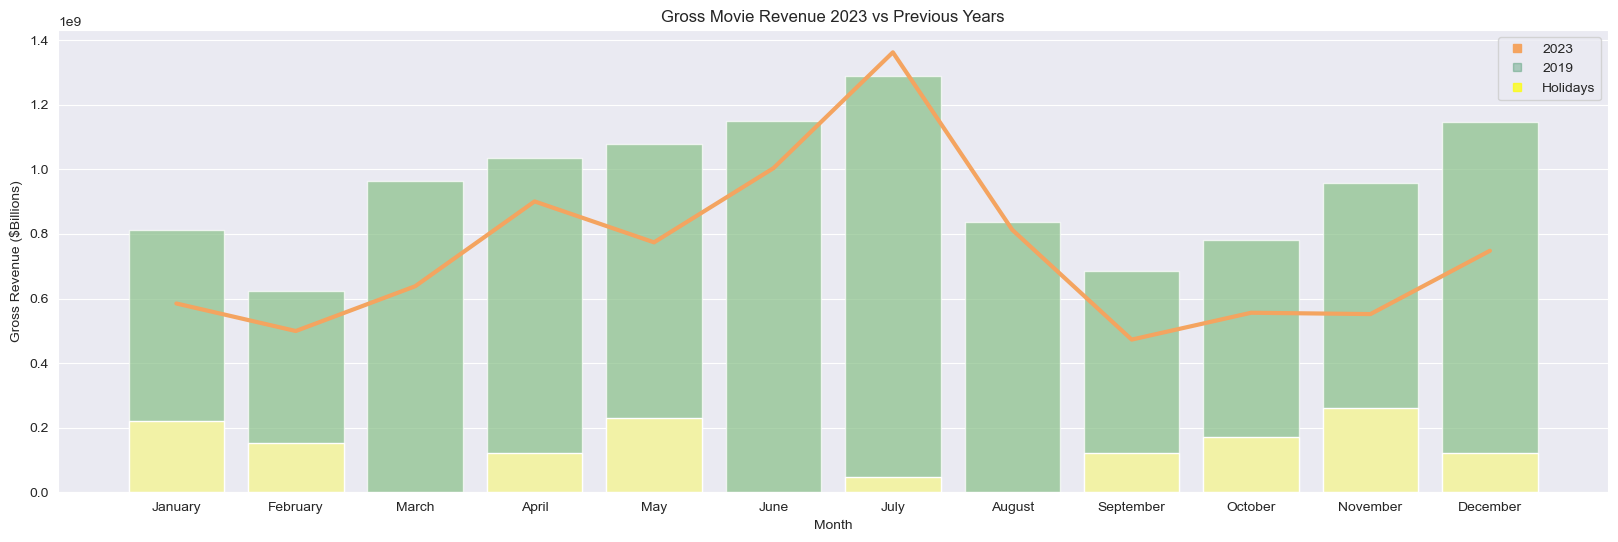

In [21]:
# Plot Revenues
import matplotlib.lines as mlines

# Input years to compare
reference_year = 2023      # Line plot input
dropdown_year = 2019      # Barplot input/Dropdown Button

# Adjust Dataframes to Input years
rev_2023 = reverse_rev[reverse_rev['Year'] == reference_year]
rev_not_2023 = reverse_rev[reverse_rev['Year'] == dropdown_year]
# Create figure
plt.figure(figsize=(20, 6))
sns.set_style('darkgrid')
# layer the plots
sns.barplot(data=rev_not_2023, x='Month', y='Cumulative Gross', hue='Year', palette = 'Accent', alpha = .7)
sns.barplot(data=rev_not_2023, x='Month', y='Holiday Gross', hue='Year', palette = 'Accent_r', alpha = 1.0)
sns.lineplot(data=rev_2023, x='Month', y='Cumulative Gross', color = 'sandybrown', linewidth = 3)
# Legends/Labels
plt.ylabel('Gross Revenue ($Billions)')
drop_year = mlines.Line2D([], [], color='seagreen', marker='s', ls='', alpha=.35, label=f'{dropdown_year}')
ref_year = mlines.Line2D([], [], color='sandybrown', marker='s', ls='', label=f'{reference_year}')
holiday = mlines.Line2D([], [], color='yellow', marker='s', ls='', alpha=.7, label='Holidays')
plt.legend(handles=[ref_year, drop_year, holiday])
plt.title('Gross Movie Revenue 2023 vs Previous Years')

# plt.savefig('Gross_Rev_Vis_Single')
plt.show()

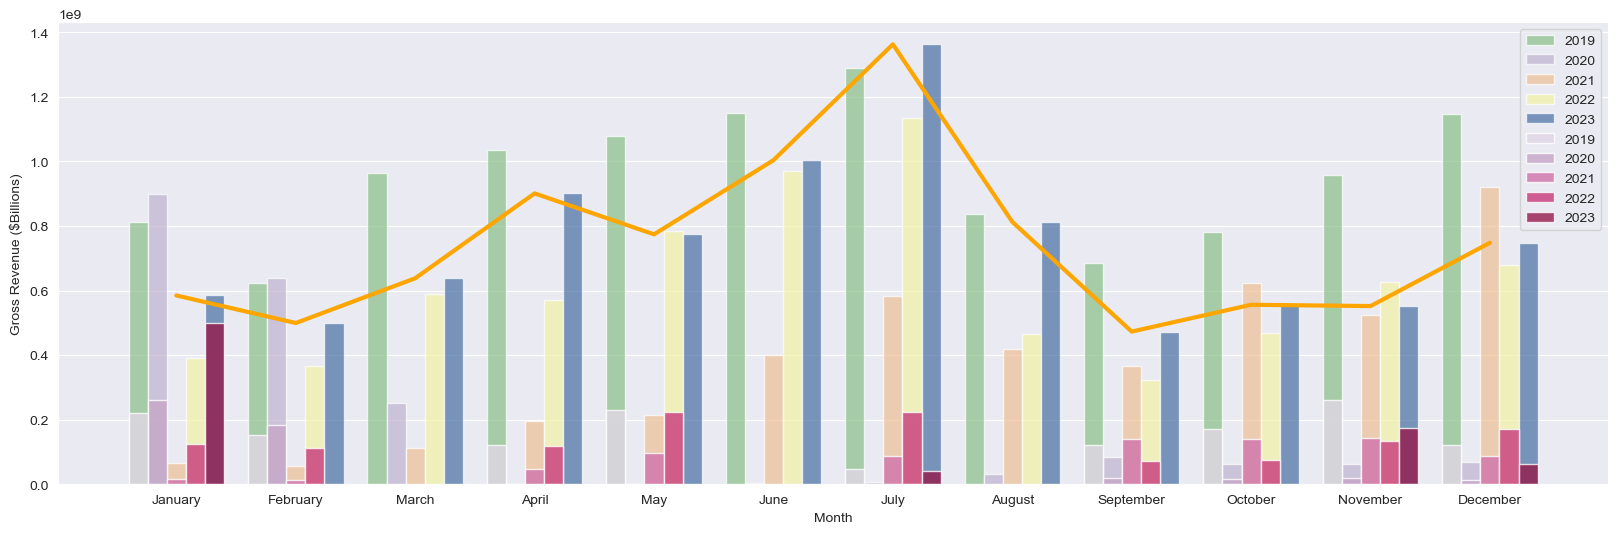

In [12]:
# Plot Revenues
import matplotlib.lines as mlines

# Input years to compare
reference_year = 2023      # Line plot input
# comparable_year = 2021     # Barplot input

# Adjust Dataframes to Input years
rev_2023 = reverse_rev[reverse_rev['Year'] == reference_year]
# rev_not_2023 = reverse_rev[reverse_rev['Year'] == comparable_year]

# Create figure
plt.figure(figsize=(20, 6))
sns.set_style('darkgrid')

# layer the plots
sns.barplot(data=reverse_rev, x='Month', y='Cumulative Gross', hue='Year', palette = 'Accent', alpha = .7)
sns.barplot(data=reverse_rev, x='Month', y='Holiday Gross', hue='Year', palette = 'PuRd', alpha = .8)
sns.lineplot(data=rev_2023, x='Month', y='Cumulative Gross', color = 'orange', linewidth = 3)

# Legends/Labels
plt.ylabel('Gross Revenue ($Billions)')
# c_year = mlines.Line2D([], [], color='seagreen', marker='s', ls='', alpha=.35, label='Gross')
# ref_year = mlines.Line2D([], [], color='orange', marker='s', ls='', label=f'{reference_year}')
# holiday = mlines.Line2D([], [], color='yellow', marker='s', ls='', alpha=.7, label='Holidays')

# plt.legend(handles=[ref_year, c_year, holiday])
plt.rcParams["figure.figsize"] = (1200, 600)

plt.show()

C:\Users\CherKare\anaconda3\envs\dev\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x700 with 0 Axes>

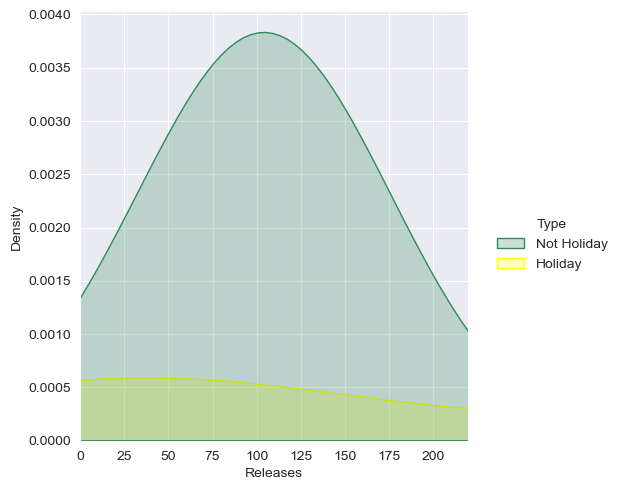

In [13]:
reference_year = 2023

releases_2023 = reverse_rev[reverse_rev['Year'] == reference_year].reset_index()
releases_2023 = releases_2023.fillna(0)
rev_releases_2023 = pd.DataFrame()
rev_releases_2023['Net Releases'] = releases_2023['Releases'] - releases_2023['Holiday Releases']
rev_releases_2023['Releases'] = rev_releases_2023['Net Releases']
rev_releases_2023['Type'] = 'Not Holiday'

holiday_releases_df = reverse_rev[['Holiday Releases']][reverse_rev['Year'] == reference_year].reset_index()
holiday_releases_df['Releases'] = holiday_releases_df['Holiday Releases']
holiday_releases_df['Type'] = 'Holiday'

df1 = rev_releases_2023[['Type','Releases']]
df2 = holiday_releases_df[['Type','Releases']]
combined_releases = pd.concat([df1,df2]).dropna()

plt.figure(figsize=(12,7))

# fig, ax = plt.subplots()

sns.displot(data=combined_releases, x='Releases', hue='Type', kind='kde', palette=['seagreen','yellow'], alpha=.25, fill=True)
# sns.displot(data=holiday_releases_df, x='Releases', kind='kde', color="yellow", alpha=.5, ax=ax)
# sns.displot(data=combined_releases, x='Releases', hue='Type', kind='hist', palette=['seagreen','yellow'], alpha=.25, bins=50, common_norm=False)

plt.xlim(0,220)
# plt.tight_layout()
plt.show()

# rev_releases_2023.info()

In [14]:
reverse_rev.head(3)

,Month,Year,Cumulative Gross,% of Year,Releases,Average,Holiday Gross,Holiday Releases,Monthly Average,Holiday Average
0,January,2019,812849718,7.2%,161,5048756,221945359.0,122.0,550055776.6,2.250627e+08
1,February,2019,624462229,5.5%,147,4248042,152447001.0,86.0,437138364.0,1.149891e+08
2,March,2019,962715490,8.5%,192,5014143,NaN,NaN,511442553.0,NaN


## Bokeh Code - Not Used

In [156]:
# from bokeh.palettes import Pastel2
# from bokeh.io import output_file, show
# from bokeh.layouts import widgetbox
# from bokeh.models.widgets import Dropdown
 
# output_file("interactive_dash.html")
 
# menu = [("Item 1", "item_1"), ("Item 2", "item_2"),
#         ("Item 3", "item_3")]
# dropdown_menu = Dropdown(label = "Dropdown button",
#                          button_type = "warning",
#                          menu = menu)
 
# show(widgetbox(dropdown_menu))
# # Stacked Bar

# bar_year = 2020
# line_year = 2023

# # Adjust Dataframes to Input years
# rev_2023 = reverse_rev[['Month','Holiday Gross','Cumulative Gross']][reverse_rev['Year'] == bar_year].reset_index()
# rev_2023 = rev_2023.fillna(0)
# rev_2023['Net of Holiday'] = rev_2023['Cumulative Gross'] - rev_2023['Holiday Gross']
# rev_2023 = rev_2023[['Month','Holiday Gross','Net of Holiday']]

# ref_df = reverse_rev[['Month', 'Cumulative Gross']][reverse_rev['Year'] == line_year].reset_index()


# months = rev_2023['Month'].tolist()
# rev_list = ["holiday_rev", "net_of_holiday"]

# data = {'months'           : rev_2023['Month'].tolist(),
#         'holiday_rev'      : rev_2023['Holiday Gross'].tolist(),
#         'net_of_holiday'   : rev_2023['Net of Holiday'].tolist(),
#        }

# p1 = figure(x_range=data['months'], height=250, title="Gross Movie Revenue 2023 vs Previous Years",
#            toolbar_location=None, tools="hover", tooltips="$name @months: @$name")

# p1.vbar_stack(rev_list, x='months', width=0.9, color=['yellow', 'seagreen'], source=data, alpha=.5,
#              legend_label=rev_list)
# p1.line(x=ref_df['Month'].tolist(), y=ref_df['Cumulative Gross'].tolist(), color='sandybrown', line_width=3)


# p1.y_range.start = 0
# p1.x_range.range_padding = 0.1
# p1.xgrid.grid_line_color = None
# p1.axis.minor_tick_line_color = None
# p1.outline_line_color = None
# p1.legend.location = "top_left"
# p1.legend.orientation = "horizontal"


# # show(p1)

# # Overlapping Histograms

# # p2 = figure(height=250)

# # p2.hist



In [102]:
# from bokeh.io import show
# from bokeh.models import CustomJS, Dropdown

# reference_year = 2021
# menu = [("2019", "item_1"), ("2020", "item_2"), ("2021", "item_3")]

# dropdown = Dropdown(label="Dropdown button", button_type="warning", menu=menu)
# # dropdown.js_on_event("menu_item_click", CustomJS(code="console.log('dropdown: ' + this.item, this.toString())"))
# dropdown.js_on_event("menu_item_click", CustomJS(code="var reference_year; reference_year = this.item"))

# show(dropdown)

In [43]:
reverse_rev.head()

,Month,Year,Cumulative Gross,% of Year,Releases,Average,Holiday Gross,Holiday Releases,Monthly Average,Holiday Average
0,January,2019,812849718,7.2%,161,5048756,221945359.0,122.0,550055776.6,157609615.0
1,February,2019,624462229,5.5%,147,4248042,152447001.0,86.0,437138364.0,125385426.8
2,March,2019,962715490,8.5%,192,5014143,NaN,NaN,511442553.0,NaN
3,April,2019,1034983338,9.1%,220,4704469,121560823.0,74.0,540402535.2,104099677.2
4,May,2019,1077667188,9.5%,225,4789631,230819376.0,97.0,570672782.4,151209953.4


In [45]:
combined_releases.head()

,Type,Releases
0,Not Holiday,15.0
1,Not Holiday,54.0
2,Not Holiday,131.0
3,Not Holiday,89.0
4,Not Holiday,44.0


In [ ]:
# from bokeh.palettes import Pastel2

# # Stacked Bar

# bar_year = 2020
# line_year = 2023


# rev_2023 = reverse_rev[['Month','Holiday Gross','Cumulative Gross']][reverse_rev['Year'] == bar_year].reset_index()
# rev_2023 = rev_2023.fillna(0)
# rev_2023['Net of Holiday'] = rev_2023['Cumulative Gross'] - rev_2023['Holiday Gross']
# rev_2023 = rev_2023[['Month','Holiday Gross','Net of Holiday']]

# ref_df = reverse_rev[['Month', 'Cumulative Gross']][reverse_rev['Year'] == line_year].reset_index()


# months = rev_2023['Month'].tolist()
# rev_list = ["holiday_rev", "net_of_holiday"]

# data = {'months'           : rev_2023['Month'].tolist(),
#         'holiday_rev'      : rev_2023['Holiday Gross'].tolist(),
#         'net_of_holiday'   : rev_2023['Net of Holiday'].tolist(),
#        }

# # Stacked Bar and Line plot
# p1 = figure(x_range=data['months'], height=370, width=1170, title="Gross Movie Revenue 2023 vs Previous Years",
#            toolbar_location=None, tools="hover", tooltips="$name @months: @$name")

# p1.vbar_stack(rev_list, x='months', width=0.9, color=['yellow', 'seagreen'], source=data, alpha=.5,
#              legend_label=rev_list)
# p1.line(x=ref_df['Month'].tolist(), y=ref_df['Cumulative Gross'].tolist(), color='sandybrown', line_width=3)


# p1.y_range.start = 0
# p1.x_range.range_padding = 0.1
# p1.xgrid.grid_line_color = None
# p1.axis.minor_tick_line_color = None
# p1.outline_line_color = None
# p1.legend.location = "top_left"
# p1.legend.orientation = "horizontal"


# # show(p1)

# # Overlapping Histograms

# # p2 = figure(height=250)

# # p2.hist



# reference_year = bar_year

# # Create a two column data frame with 'Type' (Holiday/Not Holiday) and 'Releases' for a given year
# all_releases_df = reverse_rev[['Month', 'Releases']][reverse_rev['Year'] == reference_year].dropna()
# all_releases_df['Type'] = 'Not Holiday'
# holiday_releases_df = reverse_rev[['Month', 'Holiday Releases']][reverse_rev['Year'] == reference_year].dropna()
# holiday_releases_df['Type'] = 'Holiday'
# holiday_releases_df.columns = ['Month', 'Releases', 'Type']
# # df for histogram
# # combined_releases = pd.concat([non_holiday_releases_df,holiday_releases_df]).reset_index()
# # combined_releases = combined_releases[['Type', 'Releases']]
# # combined_releases
# # data for pie
# holiday_releases = holiday_releases_df['Releases'].sum()
# non_holiday_releases = all_releases_df['Releases'].sum()-holiday_releases

# p2 = figure(width=670, height=370, toolbar_location=None,
#            title="Monthly Releases - Holiday and Non-Holiday")
# # Histogram
# x1 = all_releases_df['Releases'].tolist()
# x2 = holiday_releases_df['Releases'].tolist()
# bins = 20
# # All Releases histogram  '''density=True,'''
# hist, edges = np.histogram(x1, bins=bins)
# p2.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
#          fill_color="seagreen", line_color="white",
#          legend_label="All", alpha=.5)
# # Non Holiday histogram
# hist, edges = np.histogram(x2, bins=bins)
# p2.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
#          fill_color="yellow", line_color="grey", line_alpha=.1,
#          legend_label="Holiday", alpha=.5)


# p2.y_range.end = 3.5
# p2.y_range.start = 0
# p2.xaxis.axis_label = "Releases"
# p2.yaxis.axis_label = "Count"

# # Pie
# # https://docs.bokeh.org/en/3.2.2/docs/examples/topics/pie/pie.html
# from math import pi
# from bokeh.transform import cumsum
# from bokeh.layouts import layout

# holiday_releases = holiday_releases_df['Releases'].sum()
# non_holiday_releases = all_releases_df['Releases'].sum()-holiday_releases

# x = {
#     'Holiday': holiday_releases,
#     'Non Holiday': non_holiday_releases
# } 

# data = pd.Series(x).reset_index(name='releases').rename(columns={'index': 'type'})
# data['angle'] = data['releases']/data['releases'].sum() * 2*pi
# data['color'] = ['yellow', 'seagreen']

# p3 = figure(height=370, width=500, title=f"{reference_year} Releases", toolbar_location=None,
#            tools="hover", tooltips="@type: @releases", x_range=(-0.5, 1.0))

# p3.wedge(x=0, y=1, radius=0.4,
#         start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
#         line_color="white", fill_color='color', alpha= .5, legend_field='type', source=data)


# p3.axis.axis_label = None
# p3.axis.visible = False
# p3.grid.grid_line_color = None

# # show(p)

# # show(p2)

# # show(p3)

# # amp = Slider(start=0.1, end=10, value=1, step=.1, title="Amplitude")
# # freq = Slider(start=0.1, end=10, value=1, step=.1, title="Frequency")
# # phase = Slider(start=-6.4, end=6.4, value=0, step=.1, title="Phase")
# # offset = Slider(start=-9, end=9, value=0, step=.1, title="Offset")

# # callback = CustomJS(args=dict(source=source, amp=amp, freq=freq, phase=phase, offset=offset),
# #                     code="""
# #     const A = amp.value
# #     const k = freq.value
# #     const phi = phase.value
# #     const B = offset.value

# #     const x = source.data.x
# #     const y = Array.from(x, (x) => B + A*Math.sin(k*x+phi))
# #     source.data = { x, y }
# # """)

# # amp.js_on_change('value', callback)
# # freq.js_on_change('value', callback)
# # phase.js_on_change('value', callback)
# # offset.js_on_change('value', callback)

# # show(row(plot, column(amp, freq, phase, offset)))
# # from bokeh.models import CustomJS, Dropdown

# # menu = [("2019", 2019), ("2020", 2020), ("2021", 2021), ("2022", 2022), ('2023', 2023)]

# # dropdown = Dropdown(label="Dropdown button", button_type="warning", menu=menu)

# # dropdown.js_on_event("menu_item_click", CustomJS(args=dict(reference_year=reference_year), code="reference_year = this.item"))

# # callback = CustomJS(args=dict(source=source, amp=amp, freq=freq, phase=phase, offset=offset),
# #                     code="""
# #     const A = amp.value
# #     const k = freq.value
# #     const phi = phase.value
# #     const B = offset.value

# #     const x = source.data.x
# #     const y = Array.from(x, (x) => B + A*Math.sin(k*x+phi))
# #     source.data = { x, y }
# # """)

# # amp.js_on_change('value', callback)
# # freq.js_on_change('value', callback)
# # phase.js_on_change('value', callback)
# # offset.js_on_change('value', callback)

# # show(row(plot, column(amp, freq, phase, offset)))
# layout = layout([[p1], [p2, p3]])

# show(layout([[p1], [p2, p3]]))

In [104]:
# from bokeh.io import show
# from bokeh.models import CustomJS, Dropdown

# menu = [("Item 1", "item_1"), ("Item 2", "item_2"), None, ("Item 3", "item_3")]

# dropdown = Dropdown(label="Dropdown button", button_type="warning", menu=menu)
# dropdown.js_on_event("menu_item_click", CustomJS(code="const a = this.item"))

# show(dropdown)

In [130]:
# # Stacked Bar Example from the Bokeh Documentation
# from bokeh.palettes import HighContrast3
# from bokeh.plotting import figure, show

# # Input years to compare
# reference_year = 2023      # Line plot input
# dropdown_year = 2023       # Barplot input/Dropdown Button

# # Adjust Dataframes to Input years
# rev_2023 = reverse_rev[reverse_rev['Year'] == reference_year]
# rev_not_2023 = reverse_rev[reverse_rev['Year'] == dropdown_year]
# # Create figure
# plt.figure(figsize=(20, 6))
# sns.set_style('darkgrid')
# # layer the plots
# sns.barplot(data=rev_not_2023, x='Month', y='Cumulative Gross', hue='Year', palette = 'Accent', alpha = .7)
# sns.barplot(data=rev_not_2023, x='Month', y='Holiday Gross', hue='Year', palette = 'Accent_r', alpha = 1.0)
# sns.lineplot(data=rev_2023, x='Month', y='Cumulative Gross', color = 'sandybrown', linewidth = 3)
# # Legends/Labels
# plt.ylabel('Gross Revenue ($Billions)')
# drop_year = mlines.Line2D([], [], color='seagreen', marker='s', ls='', alpha=.35, label=f'{dropdown_year}')
# ref_year = mlines.Line2D([], [], color='sandybrown', marker='s', ls='', label=f'{reference_year}')
# holiday = mlines.Line2D([], [], color='yellow', marker='s', ls='', alpha=.7, label='Holidays')
# plt.legend(handles=[ref_year, drop_year, holiday])
# plt.title('Gross Movie Revenue 2023 vs Previous Years')

# # plt.savefig('Gross_Rev_Vis_Single')
# plt.show()



# fruits = ['Apples', 'Pears', 'Nectarines', 'Plums', 'Grapes', 'Strawberries']
# years = ["2015", "2016", "2017"]

# data = {'fruits' : fruits,
#         '2015'   : [2, 1, 4, 3, 2, 4],
#         '2016'   : [5, 3, 4, 2, 4, 6],
#         '2017'   : [3, 2, 4, 4, 5, 3]}

# p = figure(x_range=fruits, height=250, title="Fruit Counts by Year",
#            toolbar_location=None, tools="hover", tooltips="$name @fruits: @$name")

# p.vbar_stack(years, x='fruits', width=0.9, color=HighContrast3, source=data,
#              legend_label=years)

# p.y_range.start = 0
# p.x_range.range_padding = 0.1
# p.xgrid.grid_line_color = None
# p.axis.minor_tick_line_color = None
# p.outline_line_color = None
# p.legend.location = "top_left"
# p.legend.orientation = "horizontal"




# show(p)